# Virtual Experience at ANZ

### Task 1: Exploratory Data Analysis. Segmentation of Data to draw unique insights, including visualisation of the transaction volume and assessing the effect of any outliers.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [3]:
data.head(5)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [4]:
data.shape

(12043, 23)

In [5]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [6]:
data.dtypes

status                       object
card_present_flag           float64
bpay_biller_code             object
account                      object
currency                     object
long_lat                     object
txn_description              object
merchant_id                  object
merchant_code               float64
first_name                   object
balance                     float64
date                 datetime64[ns]
gender                       object
age                           int64
merchant_suburb              object
merchant_state               object
extraction                   object
amount                      float64
transaction_id               object
country                      object
customer_id                  object
merchant_long_lat            object
movement                     object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   status             12043 non-null  object        
 1   card_present_flag  7717 non-null   float64       
 2   bpay_biller_code   885 non-null    object        
 3   account            12043 non-null  object        
 4   currency           12043 non-null  object        
 5   long_lat           12043 non-null  object        
 6   txn_description    12043 non-null  object        
 7   merchant_id        7717 non-null   object        
 8   merchant_code      883 non-null    float64       
 9   first_name         12043 non-null  object        
 10  balance            12043 non-null  float64       
 11  date               12043 non-null  datetime64[ns]
 12  gender             12043 non-null  object        
 13  age                12043 non-null  int64         
 14  mercha

In [8]:
data.describe()

,card_present_flag,merchant_code,balance,age,amount
count,7717.000000,883.0,12043.000000,12043.000000,12043.000000
mean,0.802644,0.0,14704.195553,30.582330,187.933588
std,0.398029,0.0,31503.722652,10.046343,592.599934
min,0.000000,0.0,0.240000,18.000000,0.100000
25%,1.000000,0.0,3158.585000,22.000000,16.000000
50%,1.000000,0.0,6432.010000,28.000000,29.000000
75%,1.000000,0.0,12465.945000,38.000000,53.655000
max,1.000000,0.0,267128.520000,78.000000,8835.980000


### Q. What is the average transaction amount? How many transactions do customers make each month, on average?

In [9]:
average_amount = data["amount"].mean()
average_amount

187.93358797641784

In [10]:
data["date"].head(5)

0   2018-08-01
1   2018-08-01
2   2018-08-01
3   2018-08-01
4   2018-08-01
Name: date, dtype: datetime64[ns]

In [11]:
data["month"] = data["date"].dt.month
data["month"]

0         8
1         8
2         8
3         8
4         8
         ..
12038    10
12039    10
12040    10
12041    10
12042    10
Name: month, Length: 12043, dtype: int64

In [12]:
data.isnull().sum()


status                   0
card_present_flag     4326
bpay_biller_code     11158
account                  0
currency                 0
long_lat                 0
txn_description          0
merchant_id           4326
merchant_code        11160
first_name               0
balance                  0
date                     0
gender                   0
age                      0
merchant_suburb       4326
merchant_state        4326
extraction               0
amount                   0
transaction_id           0
country                  0
customer_id              0
merchant_long_lat     4326
movement                 0
month                    0
dtype: int64

In [13]:
data.nunique()

status                   2
card_present_flag        2
bpay_biller_code         3
account                100
currency                 1
long_lat               100
txn_description          6
merchant_id           5725
merchant_code            1
first_name              80
balance              12006
date                    91
gender                   2
age                     33
merchant_suburb       1609
merchant_state           8
extraction            9442
amount                4457
transaction_id       12043
country                  1
customer_id            100
merchant_long_lat     2703
movement                 2
month                    3
dtype: int64

In [14]:
#Dropping the null values and creating a new dataframe
data_f = data.drop(["currency", "country", "status", "bpay_biller_code", "first_name"], axis=1)
data_f.columns

Index(['card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'merchant_code', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'month'],
      dtype='object')

# Transaction Volume in different time periods.

In [15]:
tv_dates = data_f.groupby("month")["amount"].sum().reset_index()
tv_dates

,month,amount
0,8,729935.52
1,9,730550.21
2,10,802798.47


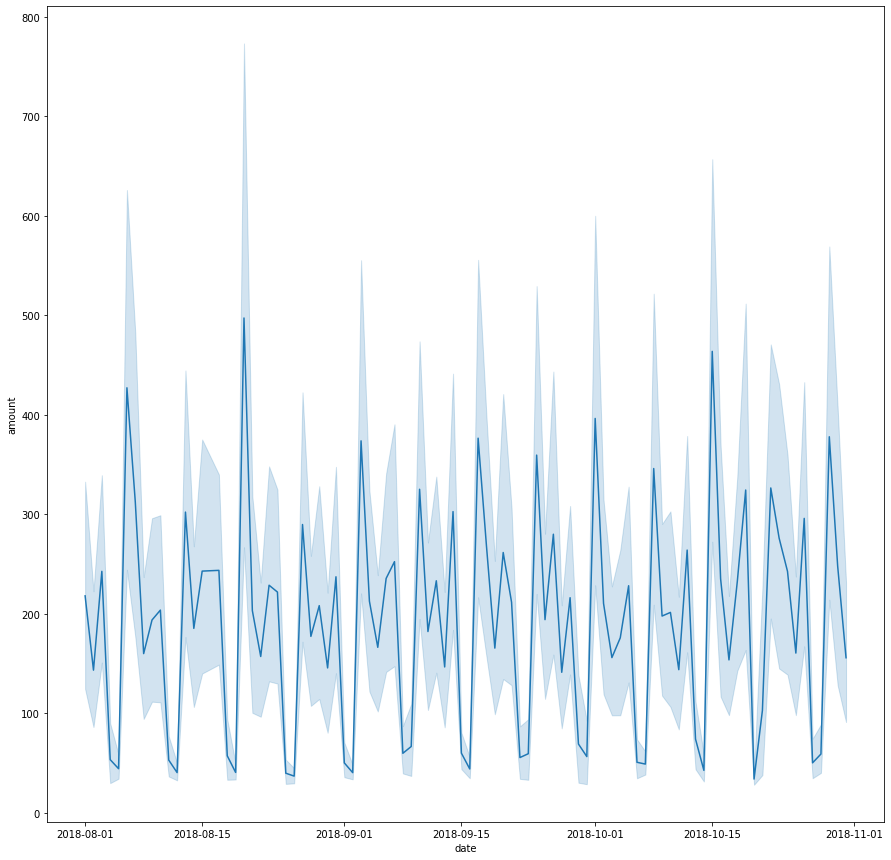

In [16]:
plt.figure(figsize=(15,15))
sns.lineplot(y="amount", x="date", data=data_f)

### Mean transaction amount per day

In [17]:
avg_tr_day = data_f.groupby("date", as_index=False)["amount"].mean()
avg_tr_day.head()


,date,amount
0,2018-08-01,218.014161
1,2018-08-02,143.331053
2,2018-08-03,242.653376
3,2018-08-04,53.356356
4,2018-08-05,44.265000


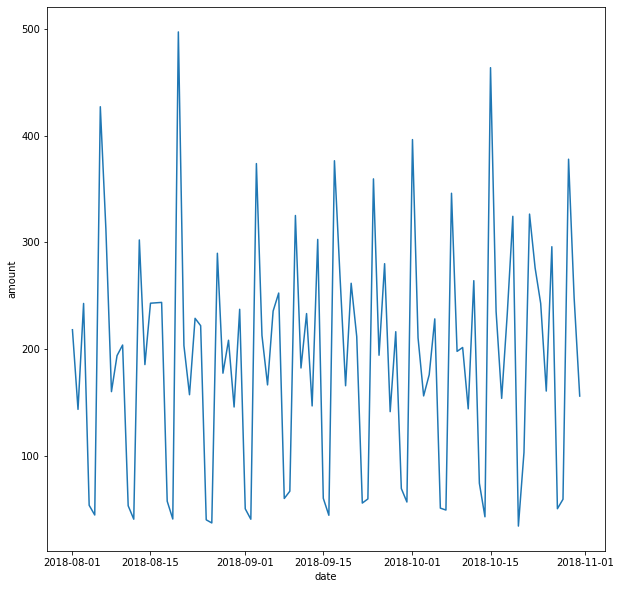

In [18]:
plt.figure(figsize=(10,10))
sns.lineplot(x="date", y="amount", data=avg_tr_day)

### Mean transaction by gender

In [19]:
avg_tr_gen = data_f.groupby(["date","gender"])["amount"].mean().reset_index()
avg_tr_gen.head()

,date,gender,amount
0,2018-08-01,F,191.952676
1,2018-08-01,M,246.050000
2,2018-08-02,F,85.452899
3,2018-08-02,M,191.446627
4,2018-08-03,F,216.349241


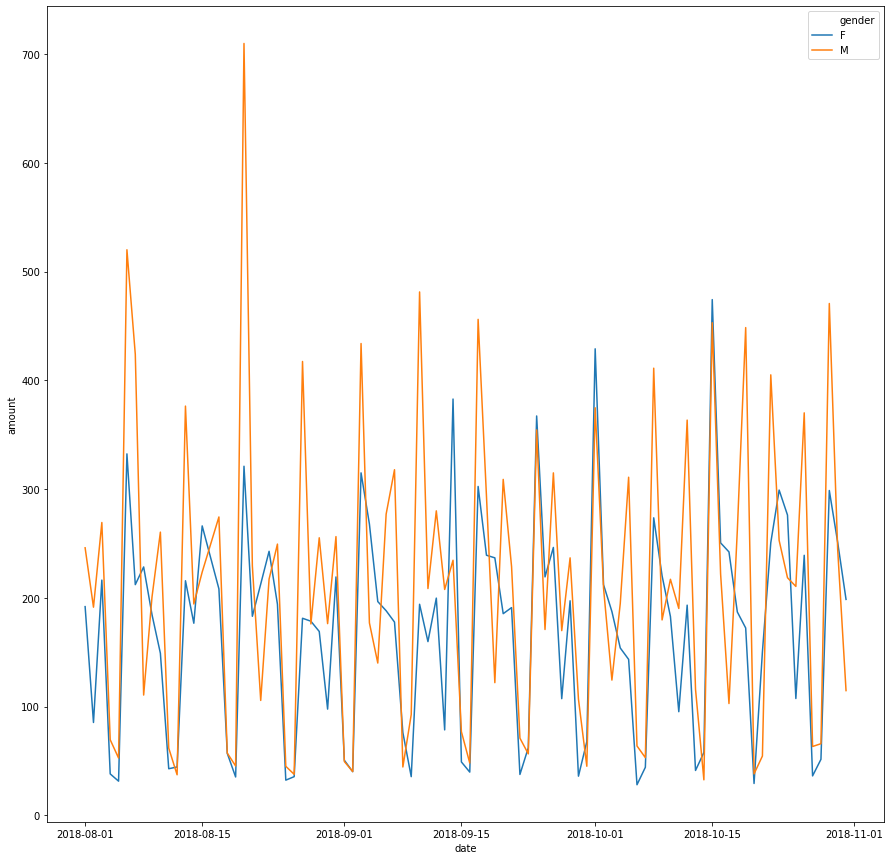

In [20]:
plt.figure(figsize=(15,15))
sns.lineplot(x="date",y="amount",hue= "gender", data=avg_tr_gen)

### Transaction Volume by merchant suburb

In [21]:
trv_merch = data_f.groupby("merchant_suburb")["amount"].sum().reset_index()
trv_merch

,merchant_suburb,amount
0,Abbotsford,2004.29
1,Aberdeen,52.45
2,Aberfeldie,57.77
3,Aberfoyle Park,84.92
4,Acacia Ridge,10.30
...,...,...
1604,Yulara,80.07
1605,Yungaburra,105.38
1606,Zetland,78.47
1607,Zillmere,38.63


In [22]:
trv_suburb_sorted = trv_merch.sort_values("amount", ascending=False)
trv_suburb_sorted

,merchant_suburb,amount
1380,Sydney,21675.44
893,Melbourne,11943.53
1322,South Brisbane,11740.58
880,Mascot,10282.62
978,Mount Gambier,4710.25
...,...,...
615,Hallidays Point,3.86
814,Lindum,3.46
327,Clyde North,2.98
1578,Woombye,2.54


In [83]:
merchant_state = data.groupby(["date","merchant_state"])["amount"].sum().reset_index()
merchant_state.head()

,date,merchant_state,amount
0,2018-08-01,NSW,828.36
1,2018-08-01,NT,73.25
2,2018-08-01,QLD,921.76
3,2018-08-01,SA,62.37
4,2018-08-01,TAS,17.13


## NSW, Northern Territory and Queensland have had a few peaks in transaction amounts over the dates.

# World Map Coordinates


In [23]:
data_f.columns

Index(['card_present_flag', 'account', 'long_lat', 'txn_description',
       'merchant_id', 'merchant_code', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'customer_id', 'merchant_long_lat', 'movement',
       'month'],
      dtype='object')

In [24]:
df_loc = data_f[["balance", "long_lat", "gender", "age", "merchant_suburb", "merchant_state", "merchant_long_lat","movement", "month"]]


In [25]:
df_loc.head(5)

,balance,long_lat,gender,age,merchant_suburb,merchant_state,merchant_long_lat,movement,month
0,35.39,153.41 -27.95,F,26,Ashmore,QLD,153.38 -27.99,debit,8
1,21.20,153.41 -27.95,F,26,Sydney,NSW,151.21 -33.87,debit,8
2,5.71,151.23 -33.94,M,38,Sydney,NSW,151.21 -33.87,debit,8
3,2117.22,153.10 -27.66,F,40,Buderim,QLD,153.05 -26.68,debit,8
4,17.95,153.41 -27.95,F,26,Mermaid Beach,QLD,153.44 -28.06,debit,8


In [26]:
df_loc["long_lat"].dtype

dtype('O')

In [27]:
df_loc = df_loc.dropna()

In [28]:
df_loc.head(5)

,balance,long_lat,gender,age,merchant_suburb,merchant_state,merchant_long_lat,movement,month
0,35.39,153.41 -27.95,F,26,Ashmore,QLD,153.38 -27.99,debit,8
1,21.20,153.41 -27.95,F,26,Sydney,NSW,151.21 -33.87,debit,8
2,5.71,151.23 -33.94,M,38,Sydney,NSW,151.21 -33.87,debit,8
3,2117.22,153.10 -27.66,F,40,Buderim,QLD,153.05 -26.68,debit,8
4,17.95,153.41 -27.95,F,26,Mermaid Beach,QLD,153.44 -28.06,debit,8


In [29]:
longitude = []
latitude = []
for row in df_loc["merchant_long_lat"]:
    long = row.split(" ")[0]
    lat = row.split(" ")[1]
    longitude.append(long)
    latitude.append(lat)
df_loc["long"] = longitude
df_loc["lat"] = latitude
df_loc.head(5)

,balance,long_lat,gender,age,merchant_suburb,merchant_state,merchant_long_lat,movement,month,long,lat
0,35.39,153.41 -27.95,F,26,Ashmore,QLD,153.38 -27.99,debit,8,153.38,-27.99
1,21.20,153.41 -27.95,F,26,Sydney,NSW,151.21 -33.87,debit,8,151.21,-33.87
2,5.71,151.23 -33.94,M,38,Sydney,NSW,151.21 -33.87,debit,8,151.21,-33.87
3,2117.22,153.10 -27.66,F,40,Buderim,QLD,153.05 -26.68,debit,8,153.05,-26.68
4,17.95,153.41 -27.95,F,26,Mermaid Beach,QLD,153.44 -28.06,debit,8,153.44,-28.06


In [30]:
df_loc[["long", "lat"]] = df_loc[["long", "lat"]].apply(pd.to_numeric)


In [31]:
df_loc.head(5)

,balance,long_lat,gender,age,merchant_suburb,merchant_state,merchant_long_lat,movement,month,long,lat
0,35.39,153.41 -27.95,F,26,Ashmore,QLD,153.38 -27.99,debit,8,153.38,-27.99
1,21.20,153.41 -27.95,F,26,Sydney,NSW,151.21 -33.87,debit,8,151.21,-33.87
2,5.71,151.23 -33.94,M,38,Sydney,NSW,151.21 -33.87,debit,8,151.21,-33.87
3,2117.22,153.10 -27.66,F,40,Buderim,QLD,153.05 -26.68,debit,8,153.05,-26.68
4,17.95,153.41 -27.95,F,26,Mermaid Beach,QLD,153.44 -28.06,debit,8,153.44,-28.06


In [32]:
df_loc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7717 entries, 0 to 12042
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   balance            7717 non-null   float64
 1   long_lat           7717 non-null   object 
 2   gender             7717 non-null   object 
 3   age                7717 non-null   int64  
 4   merchant_suburb    7717 non-null   object 
 5   merchant_state     7717 non-null   object 
 6   merchant_long_lat  7717 non-null   object 
 7   movement           7717 non-null   object 
 8   month              7717 non-null   int64  
 9   long               7717 non-null   float64
 10  lat                7717 non-null   float64
dtypes: float64(3), int64(2), object(6)
memory usage: 723.5+ KB


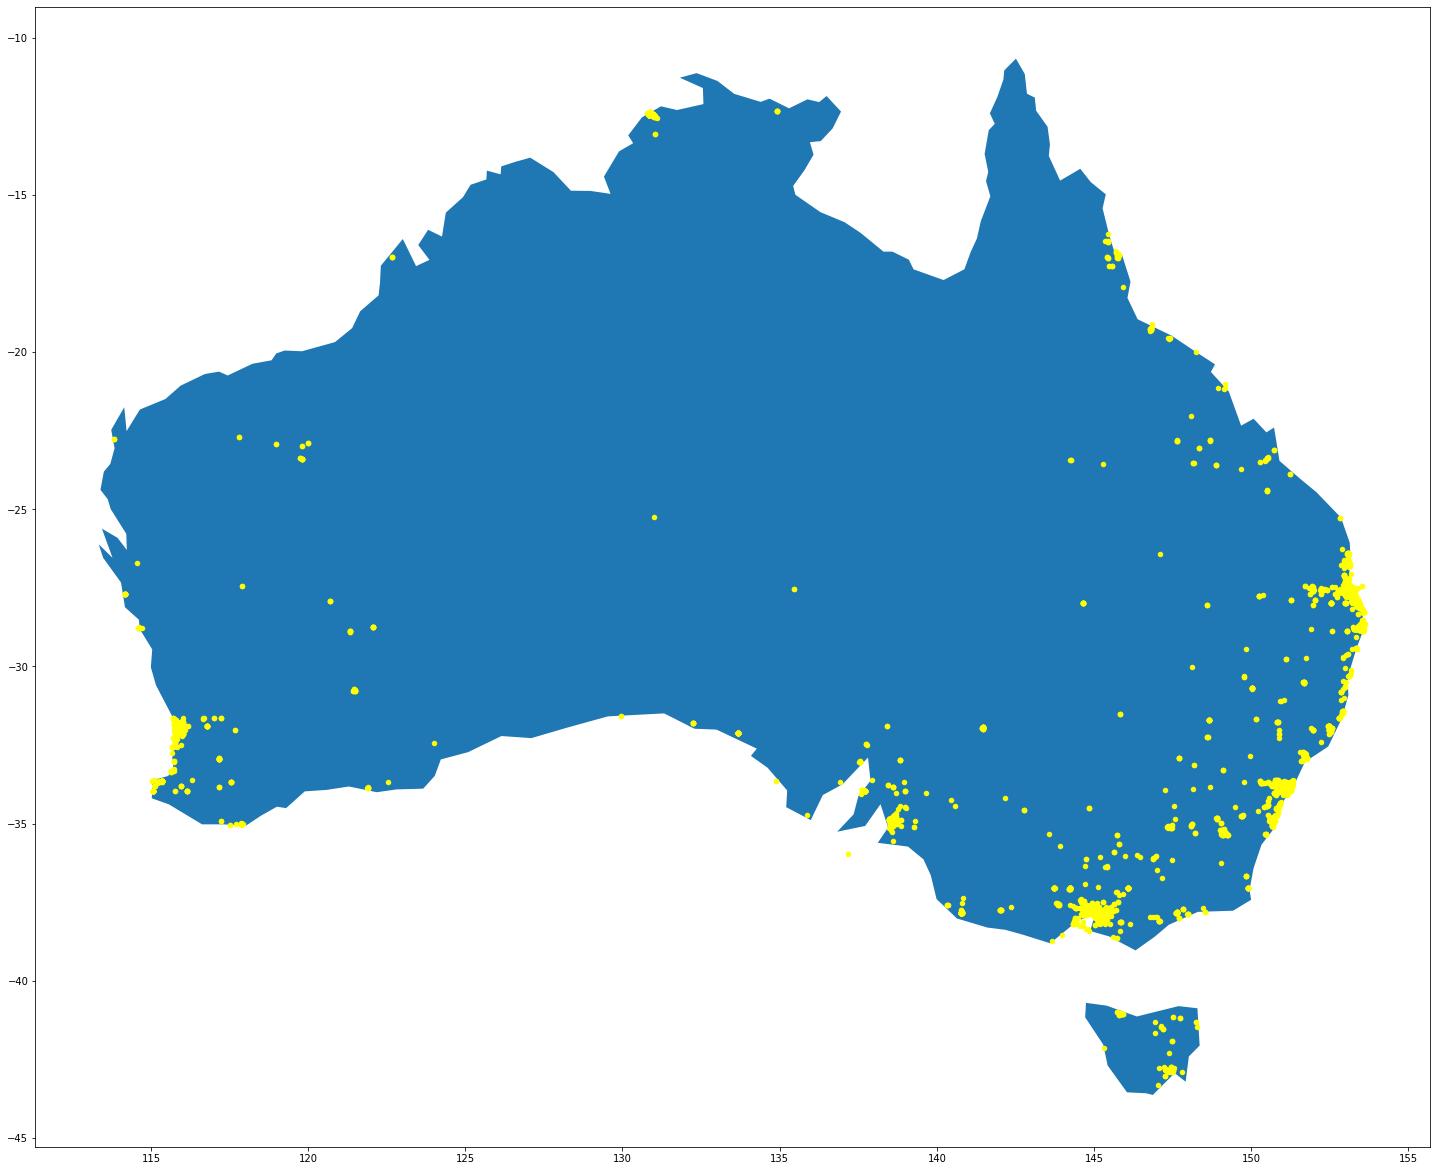

In [33]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame


#Plotting the transactions in the country
geo = [Point(xy) for xy in zip(df_loc["long"], df_loc["lat"])]
df_g = GeoDataFrame(df_loc, geometry=geo)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
aus = world[world.name =="Australia"]
df_g.plot(ax=aus.plot(figsize=(25,60)), marker="o", markersize=20, color="yellow")
       

# Task 2: Predictive Analytics

In [34]:
data.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'month'],
      dtype='object')

## Selecting important features

In [35]:
data_s = data[["account","txn_description", "gender", "age", "customer_id", "amount", "balance"]]
data_s

,account,txn_description,gender,age,customer_id,amount,balance
0,ACC-1598451071,POS,F,26,CUS-2487424745,16.25,35.39
1,ACC-1598451071,SALES-POS,F,26,CUS-2487424745,14.19,21.20
2,ACC-1222300524,POS,M,38,CUS-2142601169,6.42,5.71
3,ACC-1037050564,SALES-POS,F,40,CUS-1614226872,40.90,2117.22
4,ACC-1598451071,SALES-POS,F,26,CUS-2487424745,3.25,17.95
...,...,...,...,...,...,...,...
12038,ACC-3021093232,POS,F,30,CUS-55310383,9.79,14054.14
12039,ACC-1608363396,SALES-POS,M,20,CUS-2688605418,63.87,9137.79
12040,ACC-3827517394,POS,M,28,CUS-2663907001,43.96,45394.57
12041,ACC-2920611728,SALES-POS,M,69,CUS-1388323263,30.77,11350.67


In [36]:
data_s["txn_description"].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

In [37]:
salary = data_s[data_s["txn_description"] == "PAY/SALARY"].groupby("account").mean().reset_index()
salary = salary.rename(columns = {"amount" : "salary"})
salary = salary[["account","salary"]]
salary.head(3)

,account,salary
0,ACC-1037050564,892.09
1,ACC-1056639002,3195.01
2,ACC-1199531521,3785.78


In [38]:
data_p = data_s.groupby(["account"]).mean().reset_index()
data_p.head(3)

,account,age,amount,balance
0,ACC-1037050564,40,74.465019,3331.424479
1,ACC-1056639002,22,265.134767,46338.733837
2,ACC-1199531521,52,418.742468,10162.788961


In [39]:
data_p = pd.merge(data_p, salary, on="account")
data_p.head(3)

,account,age,amount,balance,salary
0,ACC-1037050564,40,74.465019,3331.424479,892.09
1,ACC-1056639002,22,265.134767,46338.733837,3195.01
2,ACC-1199531521,52,418.742468,10162.788961,3785.78


## Creating regression plots to check for any correlation.

Text(0.5, 1.0, 'Salary / Age')

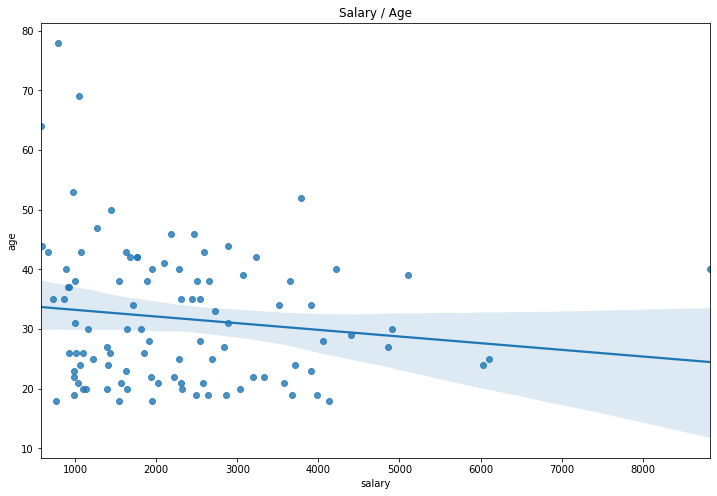

In [40]:
plt.figure(figsize=(12,8))
sns.regplot("salary", "age", fit_reg=True, data=data_p).set_title("Salary / Age")

Text(0.5, 1.0, 'Balance / Salary')

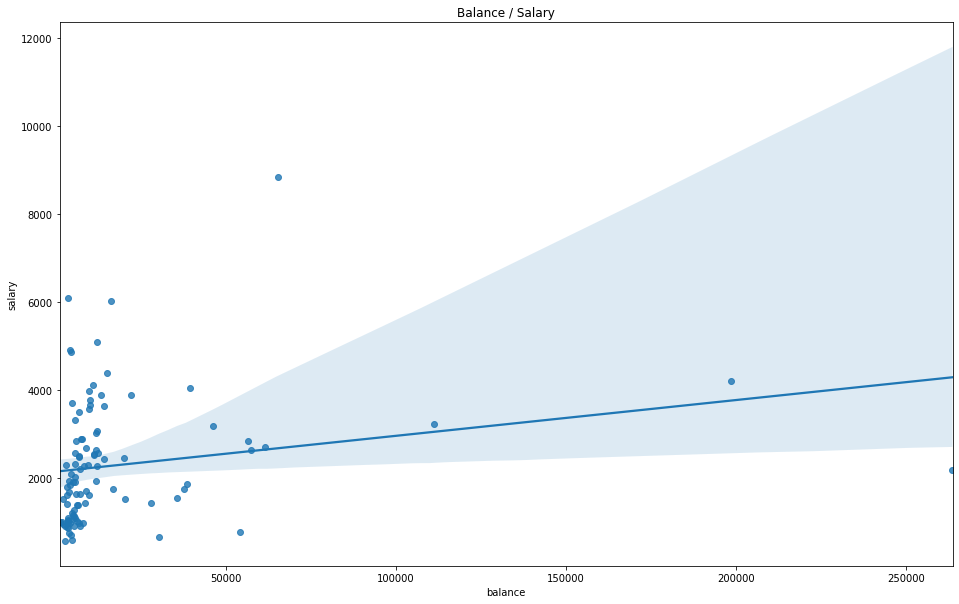

In [41]:
plt.figure(figsize=(16,10))
sns.regplot("balance", "salary", fit_reg=True, data=data_p).set_title("Balance / Salary")

Text(0.5, 1.0, 'Age / Balance')

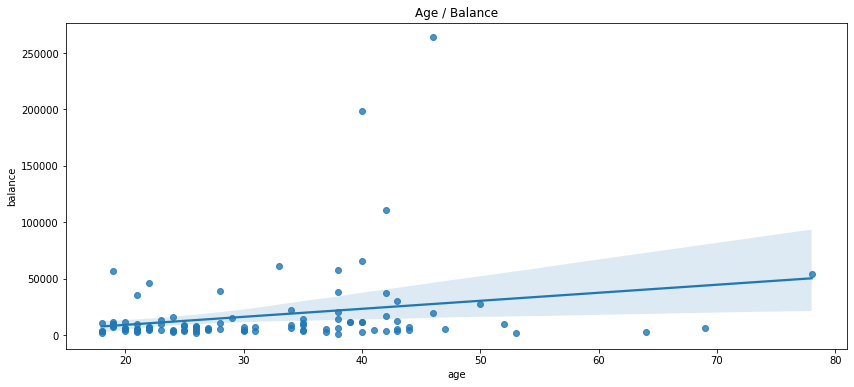

In [42]:
plt.figure(figsize=(14,6))
sns.regplot("age", "balance", data=data_p).set_title("Age / Balance")

Observation: As people get older they tend to save more, hence age and balance has a strong correlation as it should be.

In [43]:
data_s["txn_description"].unique()

array(['POS', 'SALES-POS', 'PAYMENT', 'INTER BANK', 'PAY/SALARY',
       'PHONE BANK'], dtype=object)

# Data Preparation

In [44]:
# Point of Sale
pos = data_s[ (data_s["txn_description"] == ("SALES-POS")) | (data_s["txn_description"] == ("POS")) ].groupby("account").mean().reset_index()
pos = pos[["account", "amount"]]
pos = pos.rename(columns= {"amount" : "pos"})


In [45]:
# Average Payment
avg_p = data_s[ (data_s["txn_description"] == ("PAYMENT")) ].groupby("account").mean().reset_index()
avg_p = avg_p[["account", "amount"]]
avg_p = avg_p.rename(columns= {"amount" : "avg_p"})

In [46]:
avg_p.shape

(100, 2)

In [47]:
# Inter Bank Payment
ib_p = data_s[ (data_s["txn_description"] == ("INTER BANK")) ].groupby("account").mean().reset_index()
ib_p = ib_p[["account", "amount"]]
ib_p = ib_p.rename(columns = {"amount" : "ib_p"})

In [48]:
ib_p.shape

(68, 2)

In [49]:
# Phone Bank Payment
pb_p = data_s[ (data_s["txn_description"] == ("PHONE BANK")) ].groupby("account").mean().reset_index()
pb_p = pb_p[["account", "amount"]]
pb_p = pb_p.rename(columns = {"amount" : "pb_p"})

In [50]:
pb_p.shape

(16, 2)

### Observation: As inter bank payment and phone bank payment have very less data, they will not be used to train the model.

# Merging dataframes


In [51]:
data_m = data_s.groupby("account").mean().reset_index()
data_m = data_m[["account", "age", "balance"]]
data_m.shape

(100, 3)

In [52]:
data_c = pd.merge(data_m, pos, on = "account")
data_c.shape


(100, 4)

In [53]:
data_c = pd.merge(data_c, avg_p, on="account")
data_c.shape


(100, 5)

In [54]:
data_c = pd.merge(data_c, salary, on="account")
data_c.shape

(100, 6)

In [55]:
data_c.head(3)

,account,age,balance,pos,avg_p,salary
0,ACC-1037050564,40,3331.424479,31.114864,32.461538,892.09
1,ACC-1056639002,22,46338.733837,34.060862,124.500000,3195.01
2,ACC-1199531521,52,10162.788961,39.179302,144.150000,3785.78


Dataframes phone bank transaction, inter bank transaction were not merged as the amount of data we had for those features were low.



# Feature Selection


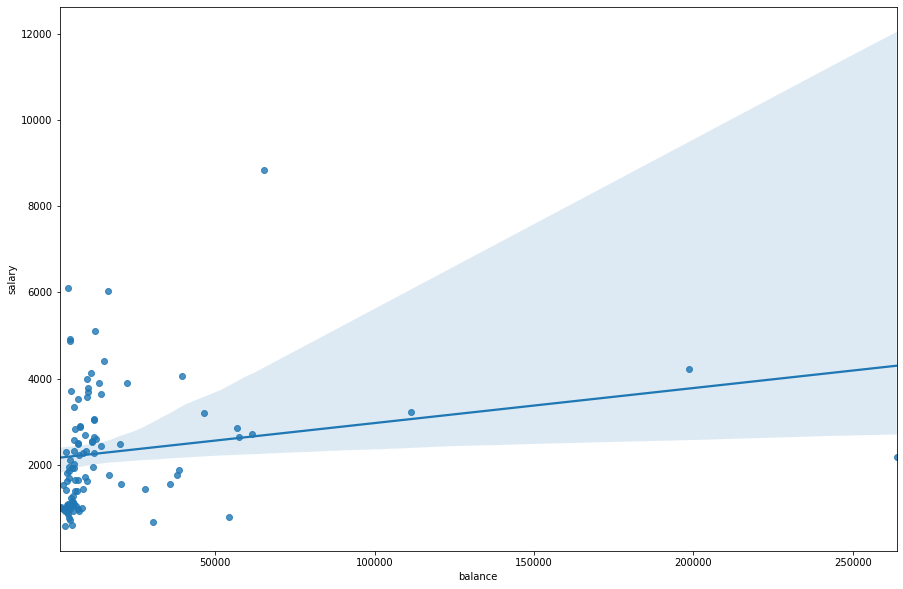

In [56]:
plt.figure(figsize= (15,10))
sns.regplot("balance", "salary", fit_reg=True, data=data_c)


Text(0.5, 1.0, 'Salary / Age')

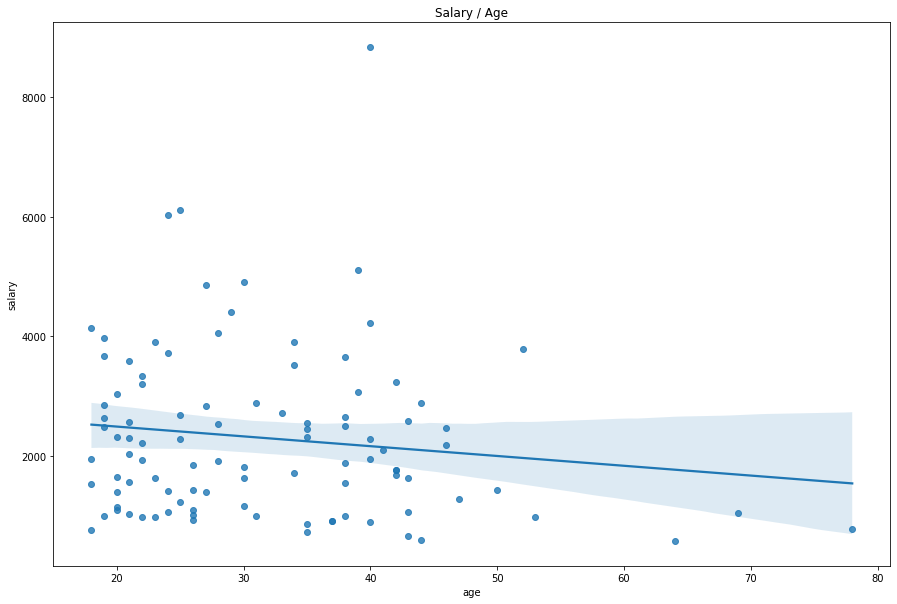

In [57]:
plt.figure(figsize=(15,10))
sns.regplot("age", "salary", fit_reg=True, data=data_c).set_title("Salary / Age")

Text(0.5, 1.0, 'Avg_p / Salary')

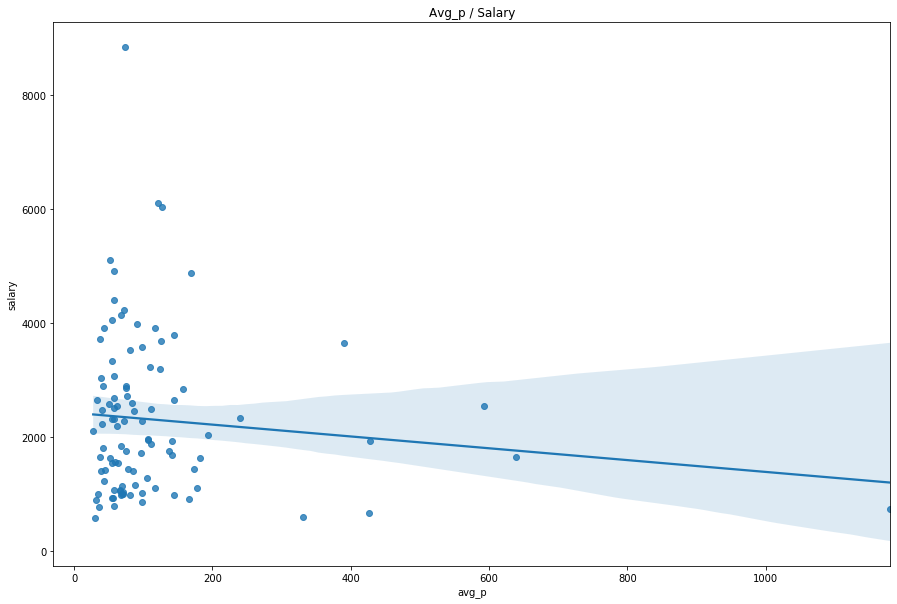

In [58]:
plt.figure(figsize=(15,10))
sns.regplot("avg_p", "salary", fit_reg=True, data=data_c).set_title("Avg_p / Salary")

Text(0.5, 1.0, 'POS / Salary')

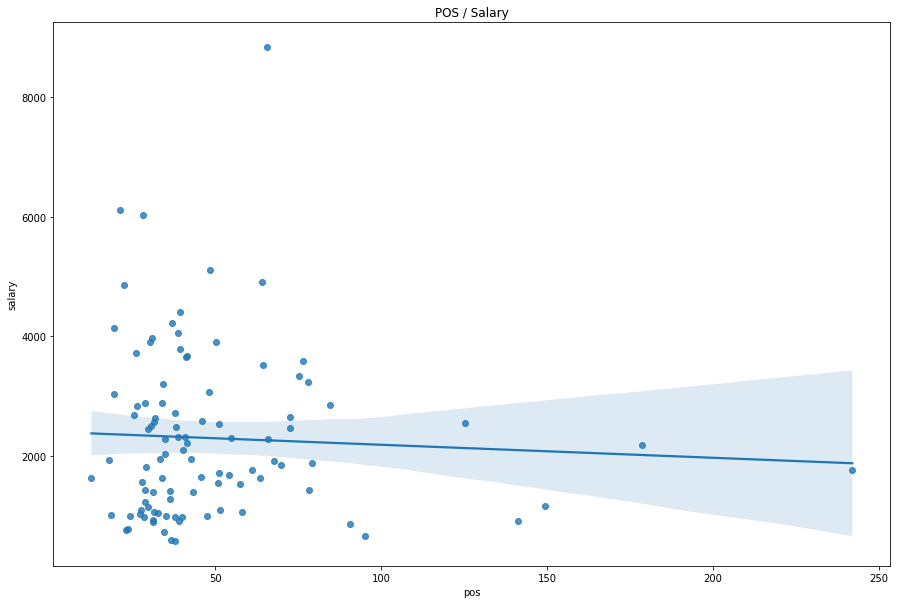

In [59]:
plt.figure(figsize=(15,10))
sns.regplot("pos", "salary", fit_reg=True, data=data_c).set_title("POS / Salary")

# Model Creation

In [60]:
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [61]:
X=data_c[["age","balance","avg_p","pos"]].values
type(X)


numpy.ndarray

In [62]:
y=data_c["salary"].values


In [63]:
y

array([ 892.09, 3195.01, 3785.78, 4863.62, 1002.13, 1681.58, 2887.34,
       2718.51, 2470.45, 3071.14, 1928.97,  862.95,  996.24, 2588.01,
       2306.63, 8835.98, 1537.68, 1013.67, 2320.3 , 1626.48, 1541.12,
       2500.  , 3977.46, 2023.68, 1395.49, 2840.15, 3649.51, 1808.62,
       1098.91, 1037.07, 1757.81, 2179.96, 2218.73, 4910.9 , 3712.56,
       2639.76, 1396.23, 2443.24,  990.55, 3676.94, 1843.14, 3026.95,
        761.33, 4405.3 , 1946.57,  664.43, 3231.26, 6024.49, 1436.98,
       2886.52, 1068.04,  970.47,  917.45,  982.71, 3328.77, 1043.12,
       1433.98,  596.33, 1636.72, 2485.37, 6107.23, 1711.39, 2544.76,
        983.36, 1225.33, 3903.73, 2101.51, 5103.51, 1408.08, 1138.79,
       2282.36, 4132.23, 1099.7 , 4054.77, 4216.04,  916.75, 1880.95,
       2687.85, 1272.47, 2647.38, 3578.65, 1630.36,  920.71, 1059.84,
       1640.83, 1757.82,  725.32,  576.  , 1952.29, 3903.95, 2280.36,
        782.42, 1916.51, 1158.15, 2854.74, 2538.68, 2308.67, 3517.61,
       1560.2 , 2572

In [64]:
len(y)

100

In [65]:
X

array([[4.00000000e+01, 3.33142448e+03, 3.24615385e+01, 3.11148636e+01],
       [2.20000000e+01, 4.63387338e+04, 1.24500000e+02, 3.40608621e+01],
       [5.20000000e+01, 1.01627890e+04, 1.44150000e+02, 3.91793023e+01],
       [2.70000000e+01, 4.51314880e+03, 1.69000000e+02, 2.23200000e+01],
       [3.80000000e+01, 1.19129142e+03, 7.02142857e+01, 3.50933333e+01],
       [4.20000000e+01, 3.96775563e+03, 1.41250000e+02, 5.40359184e+01],
       [4.40000000e+01, 7.57929155e+03, 7.45454545e+01, 3.37598413e+01],
       [3.30000000e+01, 6.14913506e+04, 7.68636364e+01, 3.79150000e+01],
       [4.60000000e+01, 1.99772980e+04, 4.04761905e+01, 7.26034286e+01],
       [3.90000000e+01, 1.20517447e+04, 5.72615385e+01, 4.81450847e+01],
       [2.20000000e+01, 5.01611000e+03, 4.28142857e+02, 1.79533333e+01],
       [3.50000000e+01, 3.65310889e+03, 9.77500000e+01, 9.05521875e+01],
       [3.10000000e+01, 3.69348022e+03, 6.98076923e+01, 4.75609278e+01],
       [4.30000000e+01, 1.24717843e+04, 8.39411765e

In [66]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=.2, random_state= 20)

# Linear Regression

In [67]:
lr = LinearRegression()


In [68]:
lr.fit(X_train, y_train)
lr.score(X, y)

0.0873615043091619

In [69]:
y_predict = lr.predict(X_test)

In [70]:
print('Coefficient of determination: ', r2_score(y_test, y_predict))


Coefficient of determination:  -0.11569976344132793


In [71]:
# Sample prediction value

print("The predicted model gives a salary of:")
print(lr.predict([[30,2000,55,55]])[0])

The predicted model gives a salary of:
2327.3461972901523


# Decision Tree

In [72]:
dt = DecisionTreeRegressor()

In [73]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [74]:
dt.predict(X_test)

array([3517.61, 8835.98, 2588.01, 2280.36, 2500.  , 2588.01, 1037.07,
       2572.91, 2101.51,  920.71, 2647.38,  862.95, 1099.7 , 3328.77,
        970.47, 3712.56, 1630.36, 2320.3 , 2101.51,  761.33])

In [75]:
dt.score(X_test, y_test)


-1.4951107833508677

In [76]:
# Sample prediction values

print("The model predicts salary will be=")
print(dt.predict([[30,2000,55,55]])[0])

The model predicts salary will be=
1408.08


# Unsupervised Models
 

In [77]:
wcss=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

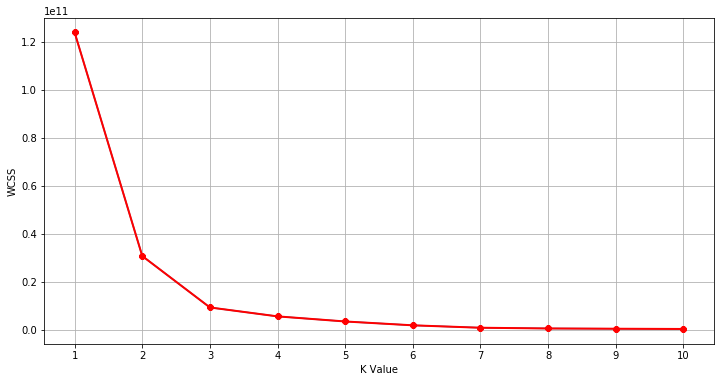

In [78]:
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [79]:
km=KMeans(n_clusters=3)
clusters = km.fit_predict(X)
data_c["label"] = clusters

In [80]:
print("First Group: ")
print(" ")
print(data_c[data_c["label"]==0])

First Group: 
 
           account  age       balance         pos       avg_p   salary  label
0   ACC-1037050564   40   3331.424479   31.114864   32.461538   892.09      0
2   ACC-1199531521   52  10162.788961   39.179302  144.150000  3785.78      0
3   ACC-1217063613   27   4513.148800   22.320000  169.000000  4863.62      0
4   ACC-1222300524   38   1191.291419   35.093333   70.214286  1002.13      0
5   ACC-1243371644   42   3967.755625   54.035918  141.250000  1681.58      0
..             ...  ...           ...         ...         ...      ...    ...
93   ACC-819621312   30   5003.940513  149.318154   88.227273  1158.15      0
95   ACC-854938045   28  11246.922426   50.980783   62.628571  2538.68      0
96    ACC-90814749   35   9525.844516   38.578837   55.400000  2308.67      0
97   ACC-958000567   34   6795.633391   64.223036   81.346939  3517.61      0
99   ACC-966140392   21   5800.773158   31.418125   51.000000  2572.91      0

[87 rows x 7 columns]


In [81]:
print("Second Group: ")
print(" ")
print(data_c[data_c["label"]==1])

Second Group: 
 
           account  age        balance         pos      avg_p   salary  label
31  ACC-2014856841   46  263753.766119  178.688824  61.750000  2179.96      1
74  ACC-3879258709   40  198565.143775   36.879125  72.216216  4216.04      1


In [82]:
print("Group 3: ")
print(" ")
print(data_c[data_c["label"]==2])

Group 3: 
 
           account  age        balance         pos       avg_p   salary  label
1   ACC-1056639002   22   46338.733837   34.060862  124.500000  3195.01      2
7   ACC-1334819143   33   61491.350647   37.915000   76.863636  2718.51      2
15  ACC-1523339231   40   65420.404231   65.648571   73.567568  8835.98      2
46  ACC-2650850707   42  111300.797619   77.987857  109.800000  3231.26      2
73  ACC-3827517394   28   39427.873576   38.740968   55.192771  4054.77      2
76    ACC-38923874   38   38687.672843   79.069355  111.214286  1880.95      2
79  ACC-4059612845   38   57566.579032   72.440000  144.500000  2647.38      2
85  ACC-4281711154   42   37842.077755  241.917778   75.684211  1757.82      2
91   ACC-721712940   78   54240.641471   23.736667   58.437500   782.42      2
94   ACC-847145727   19   56685.795802   84.430600   75.454545  2854.74      2
98   ACC-964839203   21   35816.951949   28.026957   58.914286  1560.20      2
